# Análise dos Dados do Airbnb - Londres (Inglaterra)

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**sem ao menos possuir nenhum hotel.

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Londres, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados

Todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in London (good for visualisations).*

Importante: O portal está em constante evolução, e em determinado momento, pode ser que o [conjunto de dados](https://data.insideairbnb.com/united-kingdom/england/london/2024-06-14/visualisations/listings.csv) exato utilizado nesse notebook não esteja mais disponível, o que quebraria nosso código.

Pensando nisso, disponibilizamos [aqui](https://raw.githubusercontent.com/ErnesthoSerafini/serafini_data_science/main/Datasets/dataset_listings_London_06_2024.csv) o conjunto que utilizamos, para que você sempre consiga utilizar esse material.


In [1]:
# pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# arquivo listings.csv para um DataFrame
df = pd.read_csv('https://raw.githubusercontent.com/ErnesthoSerafini/serafini_data_science/main/Datasets/dataset_listings_London_06_2024.csv', index_col='id')


## Análise dos Dados


**Dicionário das variáveis**

* `name` -> nome da propriedade anunciada                             
* `host_id` -> número do id do anfitrião                            
* `host_name` -> nome do anfitrião                         
* `neighbourhood_group` -> coluna apenas com valores ausentes              
* `neighbourhood` -> nome do bairro                     
* `latitude` -> coordenada de latitude da propriedade                         
* `longitude` -> coordenada de longitude da propriedade                       
* `room_type` -> tipo de acomodação anunciada                        
* `price` -> preço para alugar a acomodação                           
* `minimum_nights` -> número mínimo de noite para se realizar a reserva                     
* `number_of_reviews` -> número de reviews que a propriedade possui                  
* `last_review` -> data do último review                      
* `reviews_per_month` -> quantidade de reviews por mês                
* `calculated_host_listings_count` -> quantidade de propriedades que o anfitrião possui     
* `availability_365` -> número de dias de ddisponibilidade dentro de 365 dias                   
* `number_of_reviews_ltm`               
* `license` -> coluna apenas com valores ausentes      


Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [3]:
# 5 primeiras entradas
df.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
id,,,,,,,,,,,,,,,,,
41445,2 Double bed apartment in quiet area North London,180838,Sean,NaN,Barnet,51.61492,-0.25632,Entire home/apt,150.0,4,21,2024-06-07,0.14,1,175,2,NaN
13913,Holiday London DB Room Let-on going,54730,Alina,NaN,Islington,51.56861,-0.11270,Private room,53.0,1,42,2024-05-03,0.25,3,331,2,NaN
41509,Room in maisonette in chiswick,181028,Peter,NaN,Hounslow,51.49351,-0.25568,Private room,NaN,1,71,2019-12-23,0.45,1,0,0,NaN
41712,"Room with a view, shared flat, central Bankside",182322,Nina,NaN,Southwark,51.50191,-0.10204,Private room,89.0,2,127,2024-06-07,0.78,2,344,16,NaN
15400,Bright Chelsea Apartment. Chelsea!,60302,Philippa,NaN,Kensington and Chelsea,51.48780,-0.16813,Entire home/apt,120.0,4,96,2024-04-28,0.54,1,163,2,NaN


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [4]:
# identificar o volume de dados do DataFrame
print(f'Temos:\nEntradas = {df.shape[0]}\nVariáveis = {df.shape[1]}')

# verificar tipos de variáveis
df.dtypes


Temos:
Entradas = 93481
Variáveis = 17


name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                           float64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

* `neighbourhood_group` e `license` têm 100% dos valores ausentes.
* `price`, `last_review` e `reviews_per_month` têm respectivamente 34,29%, 26,47% e 26,47% de valores ausentes.

In [5]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum()/df.shape[0]).sort_values(ascending=False).apply(lambda x: f'{100*x:.2f}%')

neighbourhood_group               100.00%
license                           100.00%
price                              34.29%
last_review                        26.47%
reviews_per_month                  26.47%
host_name                           0.01%
name                                0.00%
neighbourhood                       0.00%
host_id                             0.00%
room_type                           0.00%
longitude                           0.00%
latitude                            0.00%
number_of_reviews                   0.00%
minimum_nights                      0.00%
calculated_host_listings_count      0.00%
availability_365                    0.00%
number_of_reviews_ltm               0.00%
dtype: object

### **Q3. Qual o tipo de distribuição das variáveis?**

In [6]:
df.columns

Index(['name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm', 'license'],
      dtype='object')

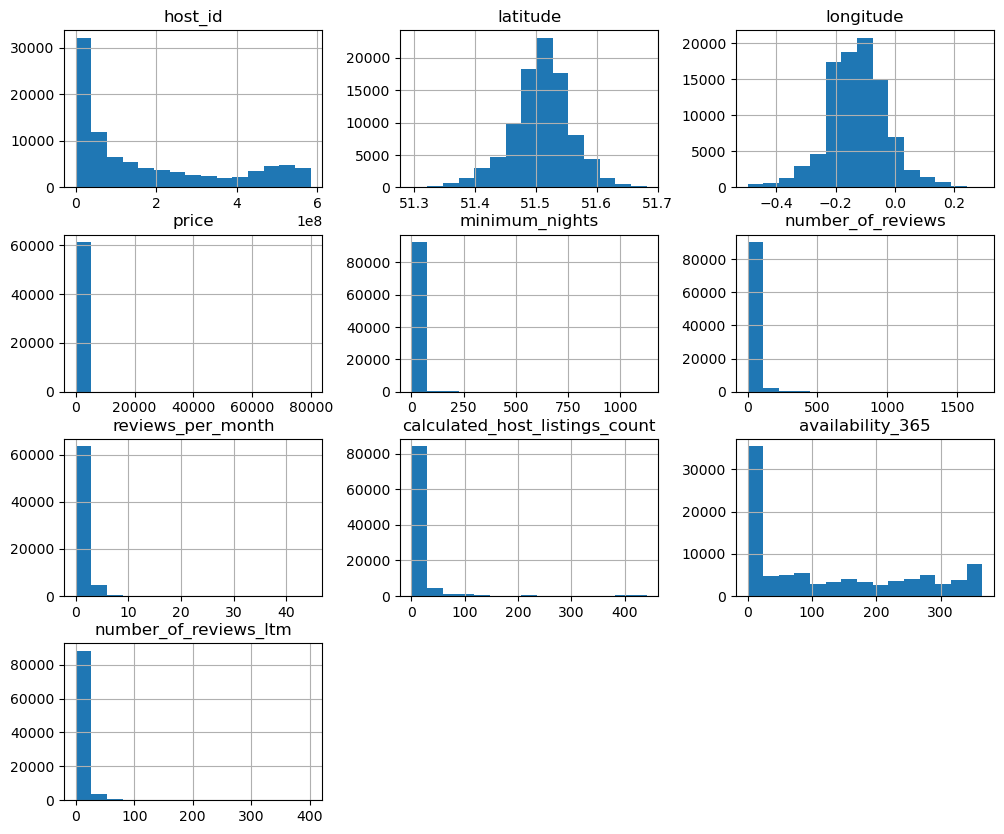

In [7]:
# plotar o histograma das variáveis numéricas
df_number = df[[ 'host_id',
       'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm']]

df_number.hist(bins=15, figsize=(12,10));

Pelo histograma temos indícios da presença de outliers. Observando as variáveis `price` e `minimum_nights`, os mesmos não seguem uma tendência.
Vamos verificar utilizaremos o resumo estátistico `describe()` e também vamos plotar `boxplots` das variáveis.


In [8]:
df_number.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,9.348100e+04,93481.000000,93481.000000,61422.000000,93481.000000,93481.000000,68739.000000,93481.000000,93481.000000,93481.000000
mean,1.790005e+08,51.509504,-0.126792,209.973527,5.459152,19.080252,0.987175,14.967416,124.253217,5.708133
std,1.872951e+08,0.048997,0.100710,961.421059,22.894163,45.767345,1.310568,49.553939,127.745091,12.072526
min,2.594000e+03,51.295937,-0.497800,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,2.386688e+07,51.483090,-0.189290,78.000000,1.000000,0.000000,0.160000,1.000000,0.000000,0.000000
50%,9.221023e+07,51.513697,-0.125940,138.000000,2.000000,4.000000,0.520000,2.000000,81.000000,1.000000
75%,3.141630e+08,51.539533,-0.067210,227.000000,4.000000,18.000000,1.260000,6.000000,243.000000,6.000000
max,5.831673e+08,51.681642,0.295731,80000.000000,1125.000000,1678.000000,44.680000,441.000000,365.000000,402.000000


Observando o describe, temos algumas hipóteses:
* A variável `price` tem 75% dos valores abaixo de 227, mas um valor máximo de 80000.
* A quantidade mínima de noites (`minimum_nights`) apresenta valor que excede 365 dias, como observado no valor máximo de 1125. Também vemos que 75% têm como 4 noites mínimas para reservar.

#### Boxplot para `price`

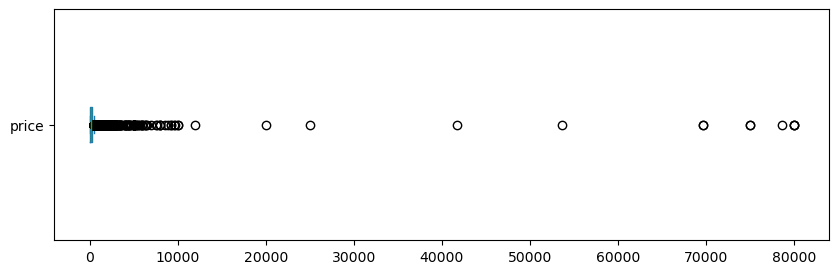

In [9]:
df['price'].plot(kind='box', vert=False, figsize=(10,3));
plt.show()

In [10]:
# Quantidade e porcentagem de entradas de price que será excluído. Valores acima de 5000.
print('price: valores acima de 5000')
print(f'Entradas = {(df['price'] > 5000).sum()}')
print(f'Percentual = {(df['price'] > 5000).sum() / df.shape[0] * 100:.2f}%')

price: valores acima de 5000
Entradas = 43
Percentual = 0.05%


#### Boxplot para `minimum_nights`

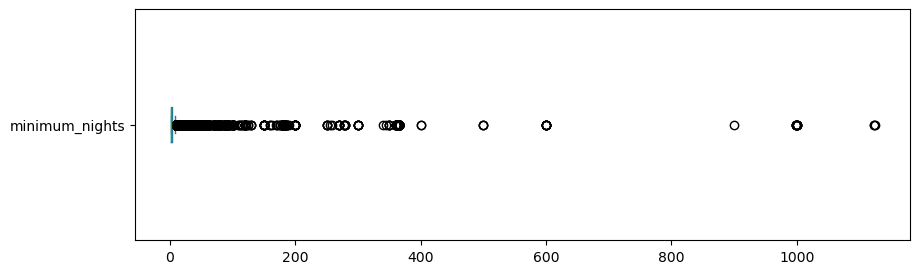

In [11]:
df['minimum_nights'].plot(kind='box', vert=False, figsize=(10,3));
plt.show()

In [12]:
# Quantidade e porcentagem de entradas de minimum_nights que será excluído. Valores acima de 100.
print('minimum_nights: valores acima de 100')
print(f'Entradas = {(df['minimum_nights'] > 100).sum()}')
print(f'Percentual = {(df['minimum_nights'] > 100).sum() / df.shape[0] * 100:.2f}%')

minimum_nights: valores acima de 100
Entradas = 370
Percentual = 0.40%


Acima em `price` e `minimum_nights` apenas foi retirado valores em que se apresentava uma porcentagem relativamente com relação aos total de entradas que é de 93481.

#### Histograma sem os outliers

Verificando os outliers, agora vamos limpar o dataframe e plotar o histograma novamente.

In [13]:
# Excluindo os outliers em um novo dataframe
df_clean = df.copy()
df_clean.drop(df_clean[df_clean['price'] > 5000].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean['minimum_nights'] > 100].index, axis=0, inplace=True)

#Excluir as colunas neighbourhood_group e license que têm 100% de dados ausentes
df_clean.drop(columns=['neighbourhood_group', 'license'], axis=1, inplace=True)

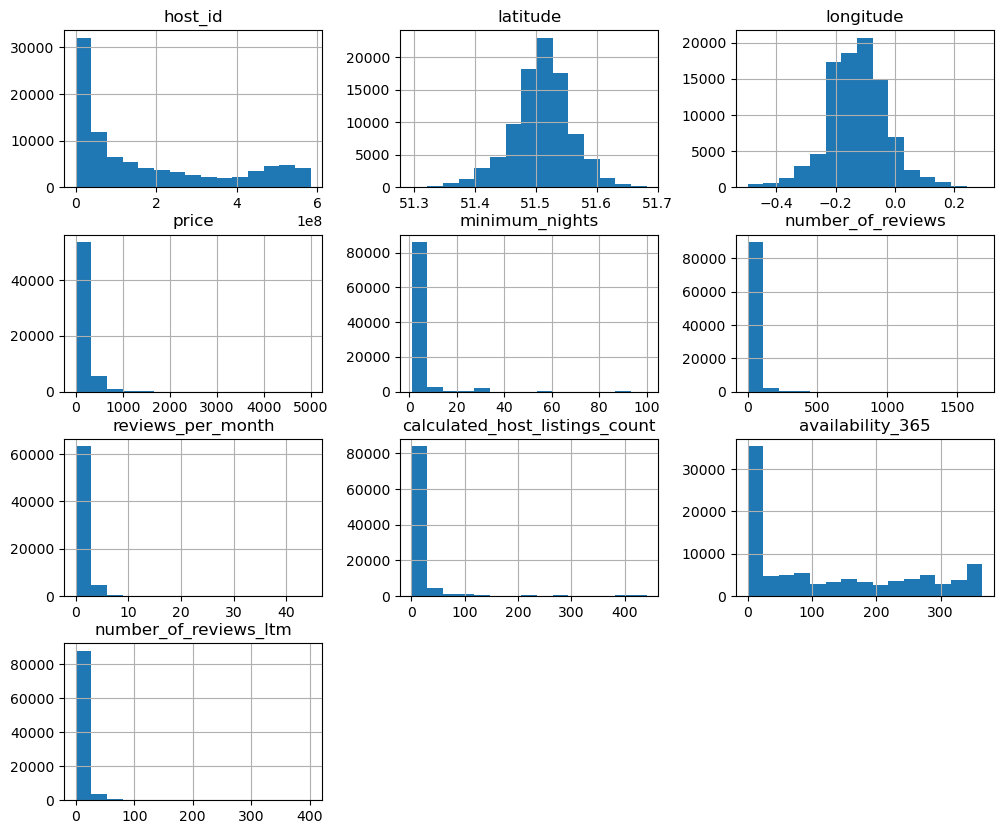

In [14]:
# Plotar histograma sem os outliers
df_clean.hist(bins=15, figsize=(12,10));

### **Q4. Qual a média dos preços de aluguel?**

In [15]:
# ver a média da coluna `price``
print(f'Média de preços de aluguel é de {df_clean['price'].mean():.2f}.')

Média de preços de aluguel é de 194.11.


### **Q5. Qual a correlação existente entre as variáveis**

In [16]:
# criar uma matriz de correlação
corr = df_clean[['host_id',
       'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm']].corr()
corr

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
host_id,1.000000,0.012907,0.012867,-0.002098,-0.044154,-0.125174,0.223051,-0.003793,0.260342,0.033392
latitude,0.012907,1.000000,0.093313,-0.005473,0.009707,-0.003746,0.011569,0.002052,-0.003714,0.003120
longitude,0.012867,0.093313,1.000000,-0.075425,-0.000940,-0.030979,-0.028601,-0.044866,-0.010487,-0.030204
price,-0.002098,-0.005473,-0.075425,1.000000,0.027667,-0.085228,-0.091991,0.101709,0.064457,-0.093693
minimum_nights,-0.044154,0.009707,-0.000940,0.027667,1.000000,-0.052171,-0.112617,0.155156,0.043368,-0.090660
number_of_reviews,-0.125174,-0.003746,-0.030979,-0.085228,-0.052171,1.000000,0.489745,-0.048494,0.043973,0.678059
reviews_per_month,0.223051,0.011569,-0.028601,-0.091991,-0.112617,0.489745,1.000000,-0.036339,0.152785,0.771323
calculated_host_listings_count,-0.003793,0.002052,-0.044866,0.101709,0.155156,-0.048494,-0.036339,1.000000,0.120744,-0.036604
availability_365,0.260342,-0.003714,-0.010487,0.064457,0.043368,0.043973,0.152785,0.120744,1.000000,0.113914
number_of_reviews_ltm,0.033392,0.003120,-0.030204,-0.093693,-0.090660,0.678059,0.771323,-0.036604,0.113914,1.000000


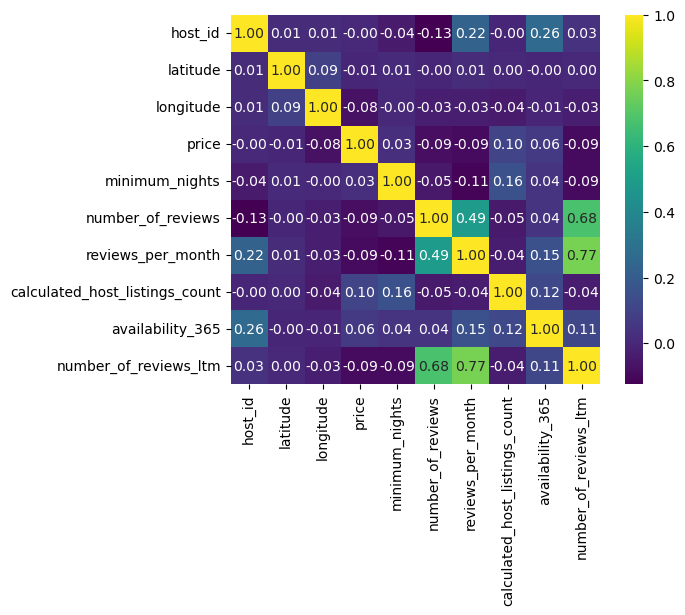

In [17]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap="viridis",fmt='.2f', square=True, linecolor='white', annot=True);

### **Q6. Qual o tipo de imóvel mais alugado no Airbnb?**

In [18]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean['room_type'].value_counts()

room_type
Entire home/apt    58931
Private room       33496
Shared room          448
Hotel room           194
Name: count, dtype: int64

In [19]:
# mostrar a porcentagem de cada tipo de imóvel disponível
(df_clean['room_type'].value_counts() / df_clean.shape[0]).apply(lambda x: f'{100 * x:.2f}%')

room_type
Entire home/apt    63.32%
Private room       35.99%
Shared room         0.48%
Hotel room          0.21%
Name: count, dtype: object

### **Q7. Quais principais anfitriões de Londres?**

In [20]:
# Os 20 principais anfitriões
df_clean.groupby(['host_id'])['host_name'].value_counts().sort_values(ascending=False)[:20]

host_id    host_name          
314162972  Blueground             441
33889201   Veeve                  390
28820321   Veronica               276
1432477    City Relay             248
48165024   Property By Capital    220
156158778  Léa                    214
269308503  Michael                186
439074505  Travelnest             171
124359784  Concept                123
215357262  Alex                   122
9063235    Executive Roomspace    120
47609036   Ben                    119
83740964   Ali                    118
224866971  Sonder (London)        117
246167719  Charlotte              116
5281536    Guesthouses Rooms      113
74167394   Dina                   108
228928499  Beatrix                107
30253178   Alisha                 103
105564995  UnderTheDoormat        101
Name: count, dtype: int64

### **Q8. Qual a localidade mais cara do dataset?**



In [21]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood'])['price'].mean().sort_values(ascending=False)[:10]

neighbourhood
Westminster               341.938865
Kensington and Chelsea    329.442264
City of London            262.279446
Camden                    224.168206
Hammersmith and Fulham    201.564054
Richmond upon Thames      192.893138
Wandsworth                186.186262
Islington                 181.150586
Lambeth                   164.754088
Southwark                 158.641268
Name: price, dtype: float64

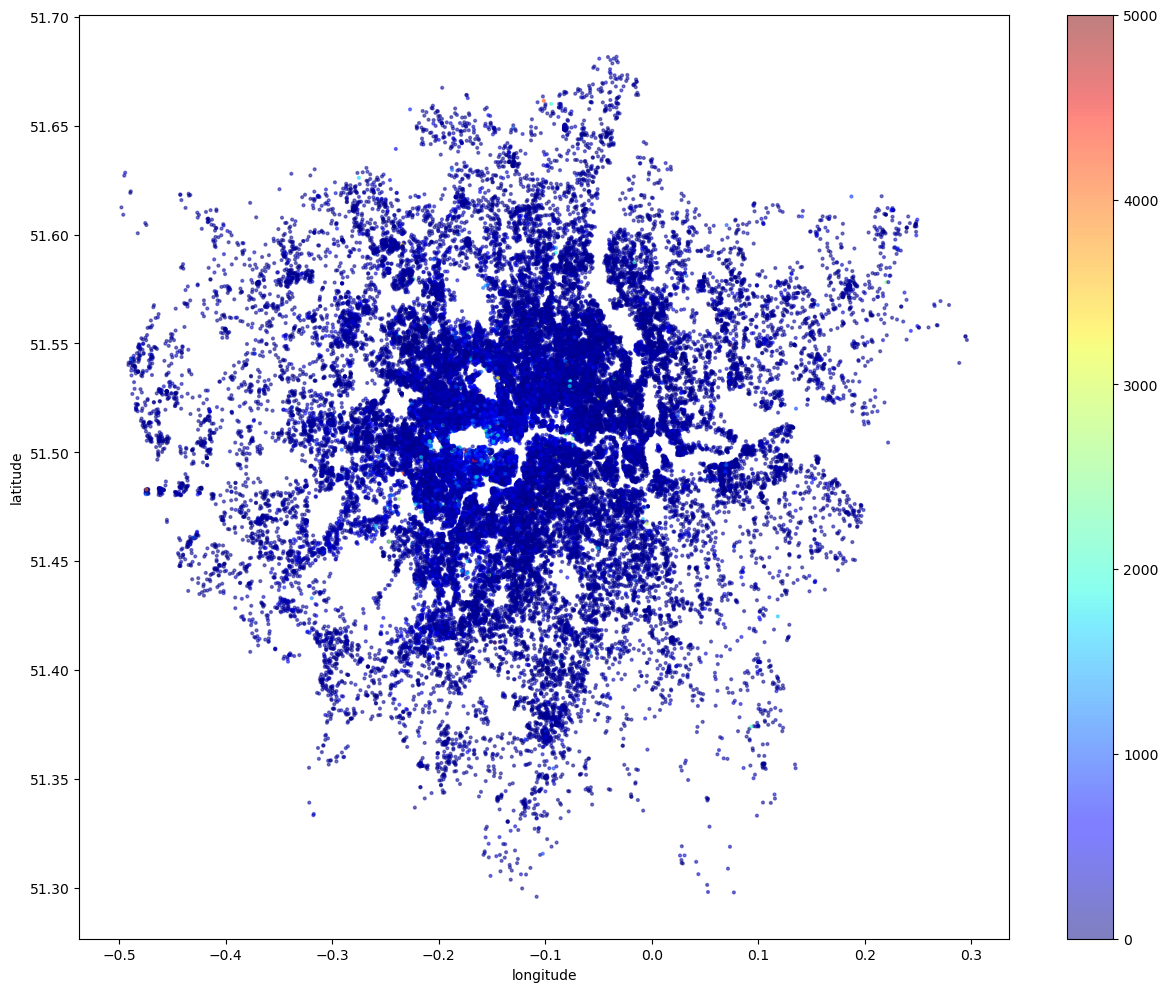

In [22]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind='scatter', x='longitude', y='latitude', alpha=0.5, c=df_clean['price'], s=4, cmap='jet', figsize=(15,12));

### **Q9. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [23]:
# ver a média da coluna `minimum_nights`
print(f'Média do mínimo de noites para reservar é {df_clean['minimum_nights'].mean():.2f}.')

Média do mínimo de noites para reservar é 4.35.


## Conclusões


* Apesar de ser uma análise apenas superficial do dataset resumido do Airbnb da cidade de Londres, é possível verificar a presença de outliers no preço e na quantidade mínima para realizar a reserva.
* A região onde se concentra grande quantidade de reservas na região mais central de Londres, conhecida como zona 1, região esta que é consentra diversos pontos turísticos. Logo, é esperado que a localidade mais cara seja mesmo Westminster.
* Com relação ao mínimo de noites para reserva, compreende o período que grande parte dos turistas costumam ficar na cidade. Aproximadamente 4 noites.
* O tipo de acomodação mais alugada é `Entire home/apt` (Casas/apartamentos inteiros) com 63.32%, seguida de `Private room` (Quartos privados) com 35.99%.